# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 17 februari 2022

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [7]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [8]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [9]:
test_images_normalized = test_images.astype('float32')/255

In [10]:
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [14]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden laag toe

In [32]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))

cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [33]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_7 (Averag  (None, 13, 13, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 average_pooling2d_8 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

In [34]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [ ]:
import time
start = time.time()
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 20, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))

end = time.time()
train_time = end - start
print('train time: ', train_time)

Epoch 1/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0253 - val_accuracy: 0.9914
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0248 - val_accuracy: 0.9930
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0191 - val_accuracy: 0.9939
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0191 - val_accuracy: 0.9936

**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [36]:
start = time.time()
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
end = time.time()
test_time = end - start
print('test time: ', test_time)
print('acc: ', acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0260 - accuracy: 0.9919
test time:  1.886709213256836
acc:  0.9919000267982483


**OPDRACHT**: voeg labels aan deze grafiek toe

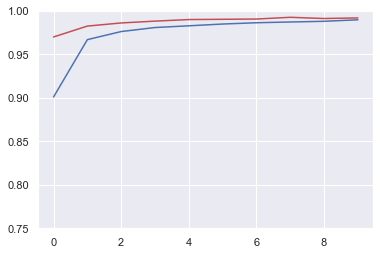

In [37]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

**Antwoord**

Het is redelijk nauwkeurig. De loss is enorm klein en er is ook geen sprake van overfitting of underfitting. Testen is heel wat sneller dan trainen. Testen duurde maar 2 seconden, terwijl trainen bijna een minuut duurde met 10 epochs. Om de nauwkeurigheid te verhogen kun je altijd nog gaan spelen met het aantal layers van het model, aantal neuronen misschien en misschien nog layers aanpassen. Ook heb ik de epochs van 3 naar 10 veranderd. Dit gaf ook een beter resultaat.

Door de kernal_size van (3,3) naar (5,5) te zetten, heeft dit de accuracy verbeterd.

Ook heb ik opgemerkt dat het aantal seconden dat duur om te testen en trainen bij CNN andersom is dan bij kNN. Bij kNN duurt testen langer, bij cNN duurt trainen langer.

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?

**Antwoord**

Tot nu toe heb ik de CNN en KNN gebruikt. Ik moet zeggen dat de accuracy van CNN wat beter is dan die van KNN en NN. Met kNN verschilt het niet heel veel: 

cNN = 0.992

kNN = 0.919

NN = 0.98

Dit zou kunnen komen, omdat de 2d structuur nog intact blijft bij CNN, terwijl bij kNN we die 2-dimensionaal maken. Bovendien kan het toepassen van convulition ook hier een rol bij spelen.